# Подготовка данных

In [ ]:
!pip install lightfm
from lightfm.data import Dataset

import pandas as pd
import numpy as np
import pickle
import datetime as d

import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.16-cp38-cp38-linux_x86_64.whl size=917955 sha256=f8e5dde7e83653128aecb383da5bdfe8c022c9fc335b8aadd97c6d46671ed50b
  Stored in directory: /root/.cache/pip/wheels/ec/bb/51/9c487d021c1373b691d13cadca0b65b6852627b1f3f43550fa
Successfully built lightfm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# сбор данных за 2015-2021 года

all_years_df = pd.DataFrame([])

for year in range(2015, 2022):
    with open(f'/content/gdrive/MyDrive/Colab Notebooks/Data/df_{year}_cleaned.pickle', "rb") as file:
      df_years = pickle.load(file)
    all_years_df = all_years_df.append(df_years, ignore_index=True)

all_years_df.rename(columns={"deals": "amount"}, inplace=True)

print(all_years_df.shape)
all_years_df.head(10)

(6156534, 7)


,datetime,ticker,amount,price,user,cf,date
0,2015-11-17 18:36:00,NLMK,1090,71.370,1_62009,-77793.300,2015-11-17
1,2015-11-17 18:36:00,NLMK,270,71.390,1_62009,-19275.300,2015-11-17
2,2015-11-17 18:37:00,NLMK,60,71.370,1_62009,-4282.200,2015-11-17
3,2015-12-09 12:55:00,MTLR,1,62.650,1_62009,-62.650,2015-12-09
4,2015-12-09 12:56:00,MTLR,1,62.650,1_62009,-62.650,2015-12-09
5,2015-12-09 12:56:00,MTLR,1,62.650,1_62009,-62.650,2015-12-09
6,2015-12-09 12:56:00,MTLR,1,62.640,1_62009,-62.640,2015-12-09
7,2015-12-14 10:37:00,MTLR,-4,65.180,1_62009,260.720,2015-12-14
8,2015-10-26 16:45:00,GAZP,70,138.000,1_62125,-9660.000,2015-10-26
9,2015-10-26 16:45:00,GAZP,100,138.000,1_62125,-13800.000,2015-10-26


In [ ]:
# сбор данных за 2021 год
df_2022 = pd.read_csv("/content/stock_market_trades (1).csv", sep=";")
df_2022.sample(10)

,id,timestamp,ticker,amount,price
14450,311044,2022-11-10 11:00:00.000,ALRS,2210.000,65.090
18767,312767,2022-11-22 16:27:00.000,AFKS,3500.000,12.750
42539,311454,2022-09-29 13:44:00.000,NVTK,10.000,946.800
44213,311454,2022-09-30 10:11:00.000,NVTK,-157.000,970.400
20884,311483,2022-10-07 20:25:00.000,PHOR,1.000,5777.000
37826,311454,2022-09-26 17:15:00.000,LKOH,-1.000,3817.000
42414,311454,2022-09-29 13:33:00.000,NVTK,-100.000,948.600
832,310207,2022-09-16 10:00:00.000,NVTK,7.000,1192.400
15064,312767,2022-09-30 13:25:00.000,MAGN,-100.000,22.940
31243,311454,2022-09-20 20:14:00.000,GAZP,300.000,218.490


In [ ]:
# обработка и создание фич
df_2022["timestamp"] = pd.to_datetime(df_2022["timestamp"])
df_2022["date"] = pd.to_datetime([d.date() for d in df_2022["timestamp"]])
df_2022["cf"] = -df_2022["amount"]*df_2022["price"]

df_2022 = df_2022.reindex(columns=["timestamp", "ticker", "amount", "price", "id", "cf", "date"])
df_2022.rename(columns={"id": "user", "timestamp": "datetime"}, inplace=True)
df_2022["user"] = df_2022["user"].astype(str)

In [ ]:
# объединение двух датафреймов

df_result=pd.concat([df_2022, all_years_df])

print(df_result.shape)
df_result.sample(19)

(6201671, 7)


,datetime,ticker,amount,price,user,cf,date
3520208,2018-12-19 16:52:00,HYDR,200000.0,0.48120,1_183759,-96240.0,2018-12-19
3795624,2018-12-19 18:16:00,SBER,-100.0,188.60000,1_190943,18860.0,2018-12-19
6677,2022-10-17 15:46:00,LNZL,-1.0,11090.00000,311253,11090.0,2022-10-17
535442,2015-10-14 15:17:00,SBER,-39310.0,85.49000,1_52623,3360611.9,2015-10-14
2488819,2016-12-06 11:16:00,MAGN,100.0,34.33000,1_93587,-3433.0,2016-12-06
6059725,2021-09-21 19:15:00,GAZP,20.0,336.34000,1_285608,-6726.8,2021-09-21
4133547,2019-12-18 15:48:00,MTLR,1.0,60.80000,1_210819,-60.8,2019-12-18
5249666,2020-11-06 11:06:00,AFLT,3240.0,59.26000,1_249715,-192002.4,2020-11-06
1910064,2016-10-26 12:39:00,VTBR,10000.0,0.06882,1_90390,-688.2,2016-10-26
5032039,2020-10-07 14:45:00,PHOR,36.0,2882.00000,1_237927,-103752.0,2020-10-07


In [ ]:
# создание файла с датафреймом
df_result.to_csv("operations.csv")

-------------------------------------------------------------------------------

# EDA и начальная обработка данных

In [ ]:
# df_result = pd.read_csv("/content/operations.csv", index_col=[0])

In [ ]:
df_result.user=df_result['user'].astype(str).astype(int)
df_result

Проблема с индексами, тк последний индекс != колву строк

In [ ]:
# проставляем индексы заново
df_result.reset_index(drop = True , inplace = True)

In [ ]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
df_result.describe().round(3)

,amount,price,user,cf,new_ticker,new_user,action
count,6201670.000,6201670.000,6201670.000,6201670.000,6201670.000,6201670.000,6201670.000
mean,632.814,1527.748,765326.466,370.330,30.721,15751.568,1.000
std,1070132.644,8616.566,516585.124,382880.280,22.680,9801.832,0.000
min,-369670000.000,0.004,147917.000,-118093092.000,0.000,0.000,1.000
25%,-100.000,60.410,184801.000,-14475.000,17.000,7684.000,1.000
50%,1.000,141.020,1150989.000,-143.700,23.000,15086.000,1.000
75%,100.000,346.750,1236986.000,14056.000,34.000,22517.000,1.000
max,663320000.000,210450.000,1301502.000,126152240.000,113.000,41115.000,1.000


Видим, что минимальное и максимальное значения сильно отличаются от соответствующих квартилей => в данных должны быть сильные выбросы

Средние по фичам тоже отклоняются от медианы в большую сторону по всем фичам => распределение данных ассиметрично по каждой из количественных переменных со смещением моды в левую часть графика распределения

In [ ]:
df_result.isnull().sum()

datetime      0
ticker        0
amount        0
price         0
user          0
cf            0
date          0
new_ticker    0
new_user      0
action        0
dtype: int64

Пропусков нет

In [ ]:
df_result.dropna(inplace = True)
df_result.reset_index(drop = True , inplace = True)

In [ ]:
buy_count = df_result[df_result.amount>0].shape[0]
print("Количество покупок акций: ", buy_count)
print("Количество продаж акций: ", df_result.shape[0]-buy_count)
print("Количество непроданных акций: ", df_result.shape[0]-2*buy_count)

Количество покупок акций:  3114894
Количество продаж акций:  3086776
Количество непроданных акций:  -28118


Постоим диаграммы размаха

In [ ]:
df_result.columns

Index(['datetime', 'ticker', 'amount', 'price', 'user', 'cf', 'date',
       'new_ticker', 'new_user', 'action'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


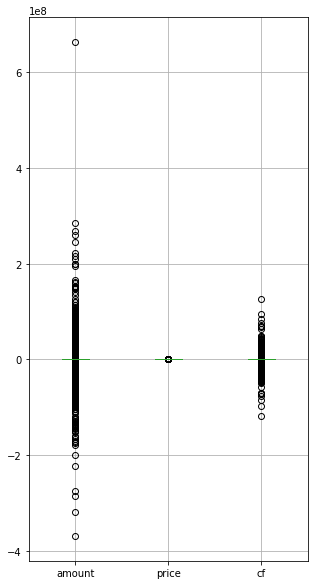

In [ ]:
print(df_result.drop(["user"], axis=1).boxplot(figsize=(5, 10)))

AxesSubplot(0.125,0.125;0.775x0.755)


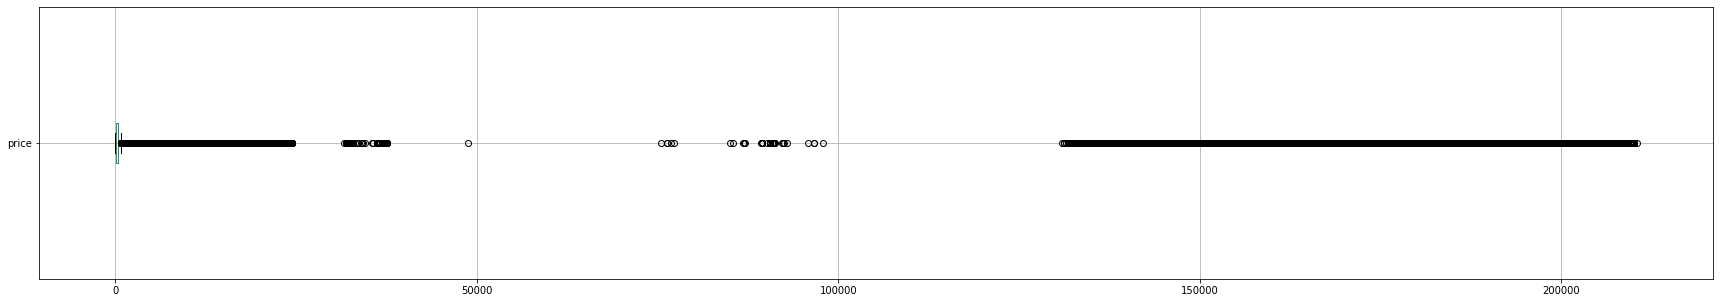

In [ ]:
print(df_result.drop(["amount", "cf", "user"], axis=1).boxplot(figsize=(30, 5), vert=False))

В столбцах количественных переменных действительно много выбросов, особенно в цене акций и объеме сделки

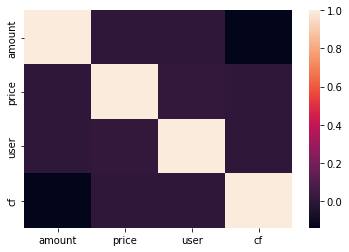

In [ ]:
sns.heatmap(df_result.corr())

In [ ]:
corrM = df_result.corr()
corrM.user

amount   0.000
price    0.013
user     1.000
cf       0.000
Name: user, dtype: float64

Все пары фичей мало коррелируют друг с другом; пара с небольшой корреляцией - пользователь и цена акции => пользователи при покупке акций немного ориентируются на ее цену. Еще меньше корреляции между юзером и количеством покупаемых акций, но она незначительна. А между полученной прибылью и пользователем корреляции нет.

Теперь проанализируем категориальные переменные

In [ ]:
print("Количество уникальных юзеров: ", df_result["user"].nunique())
print("Количество уникальных акций: ", df_result["ticker"].nunique())
print("Среднее количесво операций пользователей: ", df_result.shape[0] / df_result["user"].nunique())
print("Среднее количество операций с акциями: ", df_result.shape[0] / df_result["ticker"].nunique())

Количество уникальных юзеров:  41106
Количество уникальных акций:  114
Среднее количесво операций пользователей:  150.32202111613876
Среднее количество операций с акциями:  54202.95614035088


Посмотрим разброс активности пользователей по количеству совершенных операций

In [ ]:
user_sort_df = df_result.sort_values("user")
oper_count = 0
user_oper = []
for i in range(0, df_result.shape[0]-1):
    if df_result.user[i+1]!=df_result.user[i]:
        oper_count += 1
        user_oper.append(oper_count)
        oper_count = 0
    else:
        oper_count += 1

In [ ]:
if df_result.user[df_result.shape[0]-2]!=df_result.user[df_result.shape[0]-1]:
    user_oper.append(1)
else:
    user_oper[-1]+=1

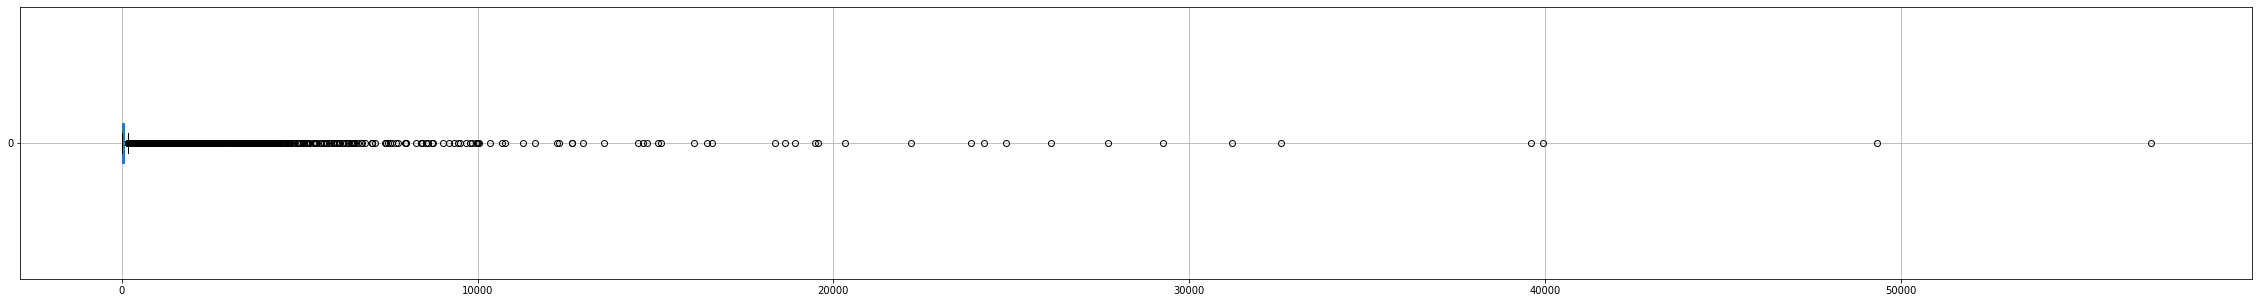

In [ ]:
pd.DataFrame(user_oper).boxplot(figsize = (40, 5), vert=False)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6fd73cb20>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc70218fdf0>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6fce1e520>]]


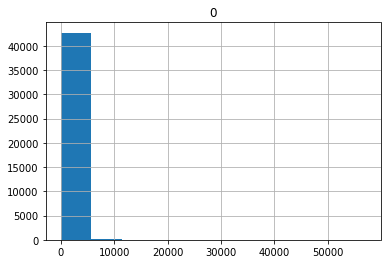

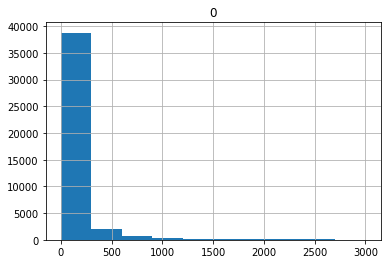

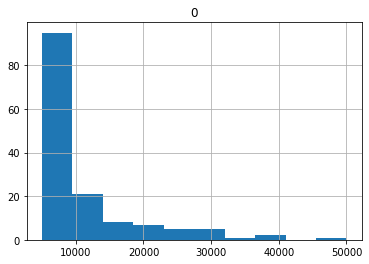

In [ ]:
print(pd.DataFrame(user_oper).hist(),
      pd.DataFrame(user_oper).hist(range=[0, 3000]),
      pd.DataFrame(user_oper).hist(range=[5000, 50000]))

По гистограммам видно, что большая часть пользователей совершила до 500 операций, при этом есть сильные выбросы - пользователи, у которых от 5000 до 50000 операций с акциями, но их количество ~130.

Теперь посчитаем разброс цен каждой акции

In [ ]:
all_tick = dict()
range_tickers = dict()
for i in range(0, df_result.shape[0]):
    if df_result.ticker[i] not in all_tick.keys():
        all_tick[df_result.ticker[i]]=[]
    all_tick[df_result.ticker[i]].append(df_result.price[i])

KeyError: ignored

In [ ]:
for k in all_tick.keys():
    if len(all_tick[k])>1:
        range_tickers[k] = [min(all_tick[k]), max(all_tick[k])]

In [ ]:
for k in range_tickers.keys():
    range_tickers[k] = range_tickers[k][1]-range_tickers[k][0]

In [ ]:
sorted_ranges=sorted(range_tickers.items(), key=lambda x: x[1], reverse=True)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6ff5fb9a0>]] [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6e097fdc0>]]


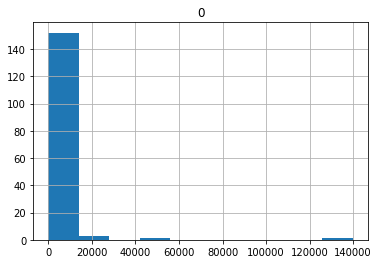

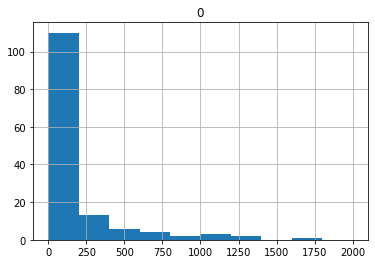

In [ ]:
print(pd.DataFrame([i[1] for i in sorted_ranges]).hist(), pd.DataFrame([i[1] for i in sorted_ranges]).hist(range=[0, 2000]))

Большая часть акций имеет размах в цене около 200, при это есть акции разница макс и мин цены которых около больше 100 000

In [ ]:
print("Топ самых нестабильных акций: ", [i[0] for i in sorted_ranges][:10])
print("Топ самых стабильных акций: ", [i[0] for i in sorted_ranges][-11:-1])

Топ самых нестабильных акций:  ['TRNFP', 'VSMO', 'LNZL', 'GMKN', 'PLZL', 'MGNT', 'FXRU', 'PHOR', 'YNDX', 'TCSG']
Топ самых стабильных акций:  ['GOLD', 'SBCS', 'FEES', 'DASB', 'MRKP', 'AKMB', 'TTLK', 'VTBR', 'LQDT', 'TGKA']
